<p>
  <img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Escudo-UdeA.svg"
       alt="UdeA logo"
       height="190px"
       align="left"
       hspace="15px">
</p>

<h1 style="margin-top: 20px;"><b>3. Experimental data fit</b></h1>

<hr>

<div align="right" style="font-size: 14px; line-height: 1.4;">
  <b>Estiven Castrillon Alzate</b><br>
  Institute of Physics<br>
  <i>Universidad de Antioquia</i><br>
  <span style="font-size: 12px;">Date: TO BE DEFINED</span>
</div>

<br><br>

# Table of Contents
1. [Introduction](#introduction)
2. [Theory](#theory)
3. [Analysis and code](#analysis-and-code)
    - [Analysis of pendulum properties](#analysis-of-pendulum-properties)
    - [Determinantion of G](#determinantion-of-g)
4. [Results](#results)
5. [Conclusions](#conclusions)
6. [References](#references)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from math import radians

**Ignore**

Functions for plots of own authorship based on @GuillaumeWein: https://towardsdatascience.com/5-steps-to-build-beautiful-bar-charts-with-python-3691d434117a

In [27]:
def linegraph(
    x, y, xtitle: str, ytitle: str,
    logscale: bool = False, main_title: str = None, main_subtitle: str = None,
    graph_title: str = None, type_graph: list = ['scatter', 'plot'], source: str = None,
    y_variable_label: str = None, error_bars_values: list = None, xlabels=None,
    ylabels=None, ax=None
):
    """
    This function takes x and y values and turns them into a clean, well-formatted
    line plot using matplotlib.

    Args:
        x (pandas.Series): Data to be placed on the x axis.

        y (pandas.Series): Data to be placed on the y axis.

        xtitle (str): Title of the x axis.

        ytitle (str): Title of the y axis.

        main_title (str, optional): Text for the main title. Default is None.
        Main title and subtitle work better when using subplots.

        main_subtitle (str, optional): Text for the subtitle. Default is None.

        graph_title (str, optional): Individual title for the graph. Default is None.

        source (str, optional): Source of the data. Default is None.

        xlabels (list of str, optional): Custom labels for the x axis ticks.
        Default is None.

        ylabels (list of str, optional): Custom labels for the y axis ticks.
        Default is None.

        ax (matplotlib axis, optional): Axis object, mainly used for subplots.
        Default is None.
    """

    if type_graph == 'scatter':
        bar = ax.errorbar(
            x,
            y,
            yerr=error_bars_values,
            color='#162D59',
            label=y_variable_label,
            fmt='o'
        )
    elif type_graph == 'plot':
        bar = ax.plot(
            x,
            y,
            color='#BABCBF',
            label=y_variable_label
        )

    # Reformat x-axis label and tick labels
    ax.set_xlabel(xtitle, fontsize=12, labelpad=10)
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_tick_params(
        labelbottom=True,
        bottom=True,
        labelsize=12,
        labelrotation=0
    )
    if xlabels:
        ax.set_xticks(x, xlabels)

    # Reformat y-axis
    ax.set_ylabel(ytitle, fontsize=12, labelpad=10)
    ax.yaxis.set_label_position("left")
    ax.yaxis.set_tick_params(
        pad=2,
        labeltop=False,
        labelbottom=True,
        bottom=False,
        labelsize=12
    )
    if ylabels:
        ax.set_xticks(y, ylabels)

    # Log scale if needed
    if logscale:
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(0.1, 1)  # Set limits on the x axis
        # ax.set_ylim(0, np.log(10))  # Set limits on the y axis
    else:
        ax.set_xlim(0, max(x) * 1.1)
        ax.set_ylim(0, max(y) * 1.1)

    # Remove the spines
    ax.spines[['top', 'left', 'bottom', 'right']].set_visible(False)

    # Make the right spine thicker
    ax.spines['right'].set_linewidth(1.1)

    # Graph title
    ax.set_title(graph_title, pad=1)

    # Add main title and subtitle
    ax.text(
        x=0.12,
        y=.99,
        s=main_title,
        transform=fig.transFigure,
        ha='left',
        fontsize=14,
        weight='bold',
        alpha=.8
    )
    ax.text(
        x=0.12,
        y=.90,
        s=main_subtitle,
        transform=fig.transFigure,
        ha='left',
        fontsize=12,
        alpha=.8
    )

    # Set source text
    if source:
        ax.text(
            x=0.1,
            y=0,
            s=f'Source: {source}',
            transform=fig.transFigure,
            ha='left',
            fontsize=10,
            alpha=.7
        )

    # Adjust margins around the plot area
    plt.subplots_adjust(left=None, right=None, wspace=None, hspace=0.4)

    # Minor adjustments
    ax.legend(loc='upper left')
    ax.grid(alpha=0.5, linestyle='--')


The instrument uncertainties are the following:
- Stopwatch (period measurements) = $\pm 0.01 \space \text{s}$
- Tape measure (pendulum lengths) = $\pm 0.1 \space \text{m}$

**Note:** The following pendulum time measurements were taken using 10 oscillations, and the pendulum length is expressed in the column names.

In [28]:
# raw_data = pd.read_excel('/content/ten_oscillation_period_data_task3 (1).xlsx')
raw_data_json = '{"0.18m":{"0":8.54,"1":8.49,"2":8.77,"3":8.88,"4":8.48,"5":8.52,"6":8.58,"7":8.46,"8":8.77,"9":8.67},"0.29m":{"0":10.9,"1":10.96,"2":10.98,"3":10.91,"4":10.99,"5":11.0,"6":10.91,"7":10.98,"8":11.02,"9":10.82},"0.39m":{"0":12.59,"1":12.64,"2":12.75,"3":12.51,"4":12.51,"5":12.69,"6":12.63,"7":12.62,"8":12.62,"9":12.6},"0.51m":{"0":14.57,"1":14.34,"2":14.42,"3":14.41,"4":14.54,"5":14.38,"6":14.52,"7":14.48,"8":14.43,"9":14.37},"0.62m":{"0":15.97,"1":15.96,"2":15.71,"3":15.81,"4":15.93,"5":15.91,"6":15.96,"7":15.8,"8":15.84,"9":15.87},"0.87m":{"0":18.54,"1":18.64,"2":18.39,"3":18.5,"4":18.73,"5":18.45,"6":18.66,"7":18.74,"8":18.51,"9":18.66}}'

raw_data = pd.read_json(raw_data_json)
print('Period data taken with different pendulum lengths')
raw_data.head(2)

Period data taken with different pendulum lengths


/tmp/ipykernel_6569/354579553.py:4: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  raw_data = pd.read_json(raw_data_json)


,0.18m,0.29m,0.39m,0.51m,0.62m,0.87m
0,8.54,10.90,12.59,14.57,15.97,18.54
1,8.49,10.96,12.64,14.34,15.96,18.64


Dataframe of the periods

In [29]:
# Dividing by 10 to obtain the period, since 10 oscillations were measured
period_data = raw_data / 10
period_data.head(2)

# DataFrame of the average periods
average_periods = pd.DataFrame(period_data.mean().reset_index())
average_periods.columns = ['pendulum_length', 'average_period']

# Taking only the numerical values of the lengths, without the units
average_periods['pendulum_length'] = (
    average_periods['pendulum_length']
    .apply(lambda x: x[:4])
    .astype('float64')
)

print('Data that will be used from now on:')
average_periods

Data that will be used from now on:


,pendulum_length,average_period
0,0.18,0.8616
1,0.29,1.0947
2,0.39,1.2616
3,0.51,1.4446
4,0.62,1.5876
5,0.87,1.8582


1-2. **Plot the obtained data. Visually verify that the data exhibit the expected behavior. Linearize the model expression in such a way that a linear relationship exists between the plotted variables.**

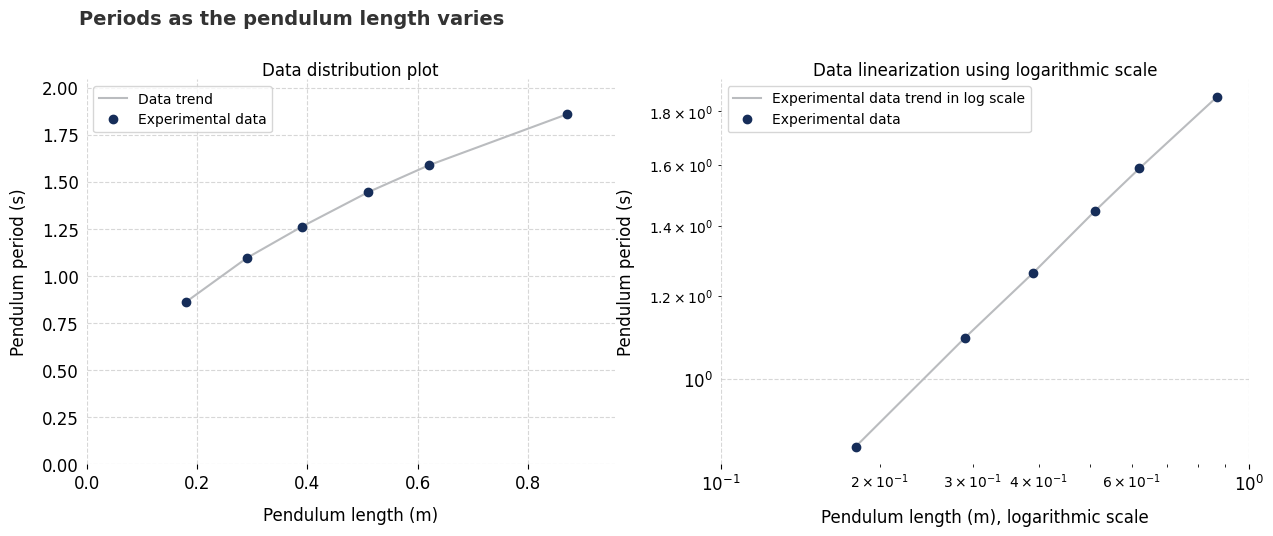

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

linegraph(
    x=average_periods['pendulum_length'],
    y=average_periods['average_period'],
    xtitle='Pendulum length (m)',
    ytitle='Pendulum period (s)',
    main_title='Periods as the pendulum length varies',
    type_graph='scatter',
    y_variable_label='Experimental data',
    ax=ax1
)

linegraph(
    x=average_periods['pendulum_length'],
    y=average_periods['average_period'],
    xtitle='Pendulum length (m)',
    ytitle='Pendulum period (s)',
    type_graph='plot',
    y_variable_label='Data trend',
    graph_title='Data distribution plot',
    ax=ax1
)

linegraph(
    x=average_periods['pendulum_length'],
    y=average_periods['average_period'],
    logscale=True,
    xtitle='Pendulum length (m)',
    ytitle='Pendulum period (s)',
    type_graph='plot',
    y_variable_label='Experimental data trend in log scale',
    ax=ax2
)

linegraph(
    x=average_periods['pendulum_length'],
    y=average_periods['average_period'],
    logscale=True,
    xtitle='Pendulum length (m), logarithmic scale',
    ytitle='Pendulum period (s)',
    type_graph='scatter',
    y_variable_label='Experimental data',
    graph_title='Data linearization using logarithmic scale',
    ax=ax2
)

plt.show()

***NOTE: The line plots ARE NOT FITS, they are trend lines that connect the points given by the experimental data***

3. **Perform a linear fit to the data using the expressions of the least squares method.**

The plot shows a possible linear trend in the data, but if we analyze the equation $T = 2 \pi \sqrt{\frac{l}{g}}$ that relates the variables measured in the experiment, we can notice that there is no strictly linear relationship between the variables, more specifically between the length $l$ and the period $T$. However, a statistical method can be applied to analyze the data linearly through the following process:

Let
$$T = 2 \pi \sqrt{\frac{l}{g}} \tag{1}$$

Equation (1) can be rewritten as $T = \frac{2 \pi}{\sqrt{g}} \sqrt{l}$. Then, defining $C = \frac{2 \pi}{\sqrt{g}}$ as a **constant** and $m = \frac{1}{2}$, we obtain an expression of the form:

$$T = C \cdot l^m \tag{2}$$

Applying the natural logarithm to both sides of the equation gives:
$$\ln{T} = \ln{C \cdot l^m}$$
$$\ln{T} = \ln{C} + \ln{l^m}$$
$$\ln{T} = \ln{C} + m \cdot \ln{l}$$

It can be immediately noted that this expression has the form $Y = mX + b$, where $m = m$, $X = \ln{l}$, and $b = \ln{C}$.

From this, it follows that $e^b = C$, and substituting this into equation (2), we obtain:
$$T = e^b \cdot l^m \tag{3}$$

Thus, a linearization of the equation that relates the period and the length of the simple pendulum is obtained, *and we proceed to calculate $m$ and $b$ using the least squares method.*

In [31]:
# Least squares method to calculate m and b

ln_periods = average_periods.apply('log')  # Data in logarithmic scale
ln_periods = ln_periods.rename(columns={'pendulum_length': 'x', 'average_period': 'y'})  # Defining X and Y

# Creating x^2 and x * y columns in the data
ln_periods['x2'] = ln_periods.apply(np.square, columns=['x'])['x']
ln_periods['xy'] = ln_periods['x'] * ln_periods['y']

N = ln_periods.shape[0]  # Number of data points

# Calculation of slope and intercept of the linear model based on the data
m_least_squares = (
    (N * sum(ln_periods['xy']) - sum(ln_periods['x']) * sum(ln_periods['y'])) /
    (N * sum(ln_periods['x2']) - sum(ln_periods['x']) ** 2)
)

b_least_squares = (
    (sum(ln_periods['x2']) * sum(ln_periods['y']) - sum(ln_periods['x']) * sum(ln_periods['xy'])) /
    (N * sum(ln_periods['x2']) - sum(ln_periods['x']) ** 2)
)

print(
    f'The value of m is: {round(m_least_squares, 2)} second^2/meter \n'
    f'The value of b is: {round(b_least_squares, 2)}'
)

The value of m is: 0.49 second^2/meter 
The value of b is: 0.69


Plots of the fit over the experimental data

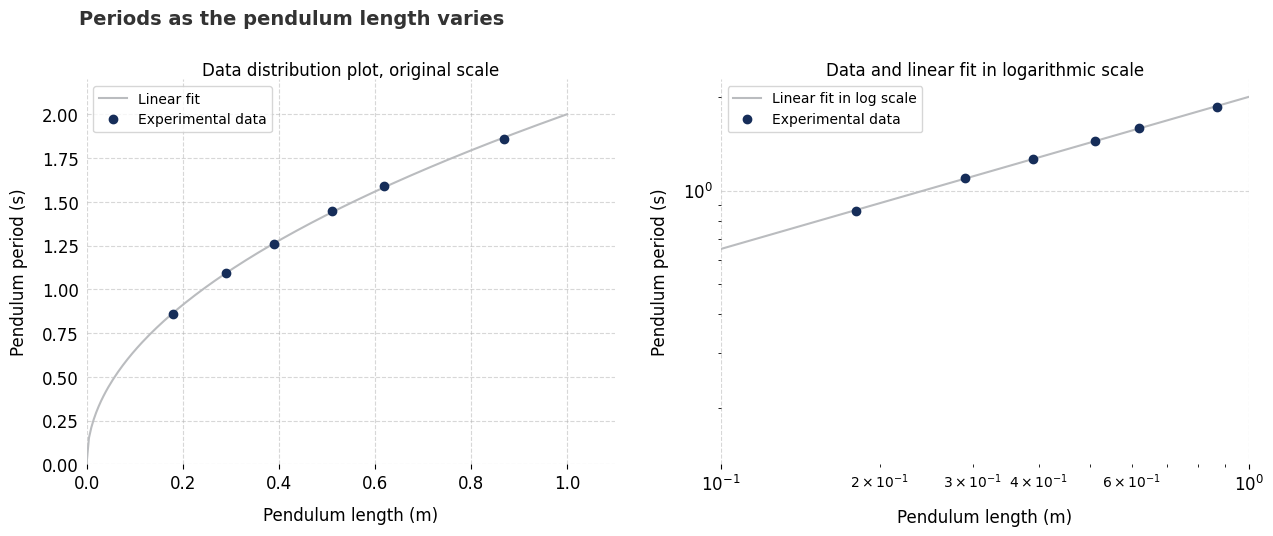

In [32]:
# Linear model function
def linear_period_fit(lengths, m, b):
    period_T = np.exp(b) * (lengths ** m)
    return period_T

length_linspace = np.linspace(0, 1, 200)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

linegraph(
    x=average_periods['pendulum_length'],
    y=average_periods['average_period'],
    xtitle='Pendulum length (m)',
    ytitle='Pendulum period (s)',
    main_title='Periods as the pendulum length varies',
    type_graph='scatter',
    y_variable_label='Experimental data',
    ax=ax1
)

linegraph(
    x=length_linspace,
    y=linear_period_fit(length_linspace, m_least_squares, b_least_squares),
    xtitle='Pendulum length (m)',
    ytitle='Pendulum period (s)',
    type_graph='plot',
    y_variable_label='Linear fit',
    graph_title='Data distribution plot, original scale',
    ax=ax1
)

linegraph(
    x=average_periods['pendulum_length'],
    y=average_periods['average_period'],
    logscale=True,
    xtitle='Pendulum length (m), logarithmic scale',
    ytitle='Pendulum period (s)',
    type_graph='scatter',
    y_variable_label='Experimental data',
    ax=ax2
)

linegraph(
    x=length_linspace,
    y=linear_period_fit(length_linspace, m_least_squares, b_least_squares),
    logscale=True,
    xtitle='Pendulum length (m)',
    ytitle='Pendulum period (s)',
    type_graph='plot',
    y_variable_label='Linear fit in log scale',
    graph_title='Data and linear fit in logarithmic scale',
    ax=ax2
)

plt.show()

4. **Use uncertainty propagation to determine the value of the gravitational acceleration along with its uncertainty.**

From equation (3) we have that $e^b = C$ and $C = \frac{2 \pi}{\sqrt{g}}$. Solving for $g$ from the expression above, which corresponds to the gravitational acceleration, we obtain:
$$g = \frac{4 \pi^2}{C^2} \Longrightarrow g = \frac{4 \pi^2}{e^{2b}}$$
In this way, the value of the gravitational acceleration is calculated using the least squares method.

In [ ]:
# Calculation of gravity using the least squares method
g_least_squares = (4 * (np.pi ** 2)) / np.exp(2 * b_least_squares)

# Common uncertainty

difference = (
    average_periods['average_period'] - linear_period_fit(
        average_periods['pendulum_length'],
        m_least_squares,
        b_least_squares
    )
)  # difference = Expected - Prediction

alpha = np.sqrt((1 / (len(difference) - 2)) * sum(difference ** 2))

# Report of gravity and its uncertainty
print(f'g = ({np.round(g_least_squares, 2)} ± {np.round(alpha, 2)}) meter/second^2')

g = (9.87 ± 0.01) meter/second^2


5. **Perform the fit (not necessarily linear) of the data, now using the curve_fit() function in Python.**

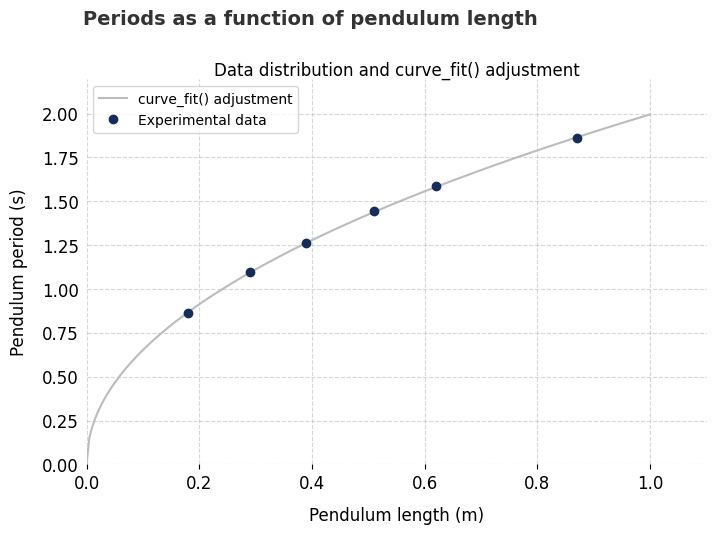

In [36]:
def curve_fit_period(long, slope_m, intercept_b):
    return np.exp(intercept_b) * (long ** slope_m)

curve_fit_params, covariance_matrix = curve_fit(
    curve_fit_period,
    average_periods['pendulum_length'],
    average_periods['average_period']
)

m_curve_fit, b_curve_fit = curve_fit_params[0], curve_fit_params[1]

length_linspace = np.linspace(0, 1, 200)
T_fitted_curve_fit = linear_period_fit(length_linspace, m_curve_fit, b_curve_fit)

fig, ax1 = plt.subplots(figsize=(8, 5))

linegraph(
    x=average_periods['pendulum_length'],
    y=average_periods['average_period'],
    xtitle='Pendulum length (m)',
    ytitle='Pendulum period (s)',
    main_title='Periods as a function of pendulum length',
    type_graph='scatter',
    y_variable_label='Experimental data',
    ax=ax1
)

linegraph(
    x=length_linspace,
    y=T_fitted_curve_fit,
    xtitle='Pendulum length (m)',
    ytitle='Pendulum period (s)',
    type_graph='plot',
    y_variable_label='curve_fit() adjustment',
    graph_title='Data distribution and curve_fit() adjustment',
    ax=ax1
)


In [ ]:
g_curve_fit = (4 * (np.pi ** 2)) / np.exp(b_curve_fit) ** 2
g_error = np.sqrt(covariance_matrix[1][1] + covariance_matrix[0][0])

print(f'The value of the slope m is: {round(m_curve_fit, 2)} second^2/meter')
print(f'The value of the intercept b is: {round(b_curve_fit, 2)}')
print(f'The value of gravity and its uncertainty calculated with curve_fit is: ({round(g_curve_fit, 2)} ± {round(g_error, 2)}) meter/second^2')

The value of the slope m is: 0.49 second^2/meter
The value of the intercept b is: 0.69
The value of gravity and its uncertainty calculated with curve_fit is: (9.91 ± 0.01) meter/second^2


Both analyses, the one performed in points 3 and 4 and the one carried out in this section, are quite similar. The values of the slope, intercept, and gravity agree well with physical reality. Nevertheless, the least squares method showed a closer agreement with the real value of the gravitational acceleration on Earth.

## 6. Comparison with the Expected Value of the Gravitational Acceleration

The experimental results obtained for the gravitational acceleration are now compared with the expected theoretical value given by

$$
g = 9.780327 \big( 1 + A\,l - B\,2l \big) - (3.086 \times 10^{-6})\,h \quad \text{m/s}^2
$$

where the constants are  
$A = 0.0053024$ and $B = 0.0000058$,  
$l$ is the latitude and $h$ is the altitude above sea level.

To quantify the agreement between the expected value and the experimentally measured value of the gravitational acceleration, the relative percentage error is used, defined as

$$
\Delta X_\% = \frac{|X_{\text{esperado}} - X_{\text{medido}}|}{X_{\text{esperado}}} \times 100\%
$$

This metric allows a direct and dimensionless comparison between both results, providing a clear measure of how close the experimental determination of $g$ is to the expected theoretical value. A smaller relative percentage error indicates a better agreement between experiment and theory.


In [38]:
# Latitude in radians
latitude = radians(6.2)

# Altitude above sea level (meters)
altitude_above_sea = 1464

# Constants
A, B = 0.0053024, 0.0000058

# Expected value of gravitational acceleration
expected_gravity = (
    9.780327 * (1 + (A * latitude) - (B * 2 * latitude))
    - (3.086e-6 * altitude_above_sea)
)

# Relative percentage error for curve_fit result
deltaX_curve_fit = (
    abs(expected_gravity - g_curve_fit) / expected_gravity
) * 100

print(f'Expected value of gravity: {round(expected_gravity, 2)} m/s^2')
print(
    f'Relative error between expected value and curve_fit result: '
    f'{round(deltaX_curve_fit, 2)}%'
)

# Relative percentage error for least squares result
deltaX_least_squares = (
    abs(expected_gravity - g_min_cuadrados) / expected_gravity
) * 100

print(
    f'Relative error between expected value and least squares result: '
    f'{round(deltaX_least_squares, 2)}%'
)

Expected value of gravity: 9.78 m/s^2
Relative error between expected value and curve_fit result: 1.36%
Relative error between expected value and least squares result: 0.9%


These relative errors can be compared with those obtained in Task 2, which was 0.75%. Even so, the value closest to this result is the one obtained using the least squares method. All the relative errors are quite low; however, the error calculated in Task 2, using a single pendulum length measurement, is significantly better than the others according to the analysis.

7. **Use the fitted model and report the period that a pendulum of 10 m length would have. Use uncertainty propagation to report it correctly (pay close attention to which variables have uncertainty in the model).**

To take into account the variables that have uncertainty in the model, I will use the method of partial derivatives for uncertainty propagation. In this case, it can be written as:
$$\Delta T = \frac{\partial T}{\partial l} \Big |_l \cdot \Delta l + \frac{\partial T}{\partial g} \Big |_g \cdot \Delta g$$

Substituting here equation (1) and differentiating, we obtain:
$$\Delta T = \frac{\pi}{\sqrt{g l}} \cdot \Delta l - \frac{\pi \sqrt{l}}{\sqrt[3]{g^2}} \cdot \Delta g$$

- For least squares, substituting $l = 10$, $g = 9.87$, $\Delta l = 0.01$ and $\Delta g = 0.01$, then $$\Delta T = 0.01$$
- For curve fit, substituting $l = 10$, $g = 9.91$, $\Delta l = 0.01$ and $\Delta g = 0.005$, then $$\Delta T = 0.01$$

In [39]:
print('The period of a 10-meter pendulum will be:')
T_min = ajuste_lineal_periodo(10, m_min_cuadrados, b_min_cuadrados)
print(f'Least squares: \n\t({np.round(T_min, 2)} ± 0.04) s')

T_curve = curve_fit_periodo(10, m_curve_fit, b_curve_fit)
print(f'Curve fit:\n\t ({np.round(T_curve, 2)} ± 0.04) s')

The period of a 10-meter pendulum will be:
Least squares: 
	(6.17 ± 0.04) s
Curve fit:
	 (6.11 ± 0.04) s
